In [1]:
# %% Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,callbacks,regularizers, activations
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("data/clean_IMDB.csv")
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [2]:
X = df['cleaned_reviews']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Import the TF-IDF Vectorizer from sklearn's feature extraction module
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  


X_train = vectorizer.fit_transform(X_train)


X_test = vectorizer.transform(X_test)

In [4]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [5]:

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  
    layers.BatchNormalization(),  
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  
])



In [6]:
# Compile and Train the First Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['mae'])  # Changed loss function
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=300,
    callbacks=[early_stopping],
    verbose=0,
)

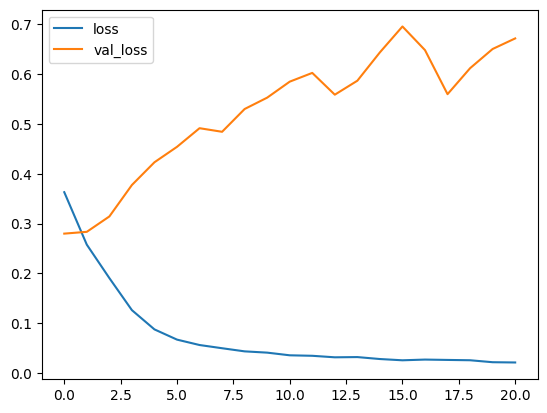

In [7]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [8]:
from tensorflow.keras import regularizers, activations

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.LeakyReLU(alpha=0.2), 
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.LeakyReLU(alpha=0.2), 
    layers.Dropout(0.2),
    layers.Dense(1)
])


c:\Users\warne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


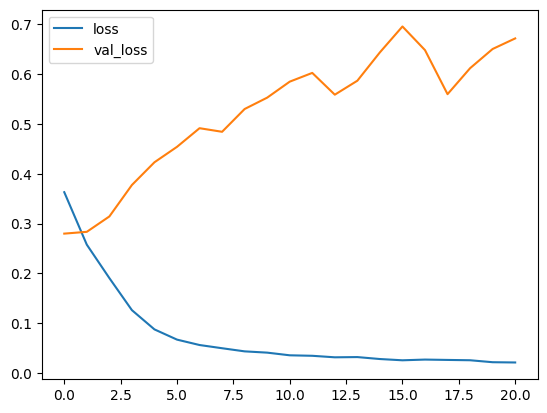

In [9]:

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert to binary
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.4961
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4961
           1       0.00      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



c:\Users\warne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\warne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\warne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
model_l2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.LeakyReLU(alpha=0.2),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.LeakyReLU(alpha=0.2),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Added sigmoid for binary classification
])


c:\Users\warne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
# Compile and Train the Second Model
model_l2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['mae'])  # Changed loss function
history_l2 = model_l2.fit(
    X_train, y_train,  # Use correct variable names
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=300,
    callbacks=[early_stopping],
    verbose=0,
)

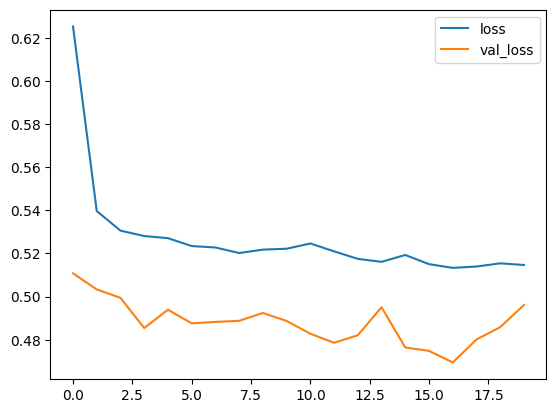

In [13]:
# Show the learning curves for the second model
history_df_l2 = pd.DataFrame(history_l2.history)
history_df_l2.loc[:, ['loss', 'val_loss']].plot();



In [14]:
# Predictions and Evaluation for the Second Model
y_pred_l2 = (model_l2.predict(X_test) > 0.5).astype("int32")  # Convert predictions to binary
print(f"Accuracy (L2 Regularized Model): {accuracy_score(y_test, y_pred_l2)}")
print(classification_report(y_test, y_pred_l2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy (L2 Regularized Model): 0.8635
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4961
           1       0.87      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [15]:
keras.utils.plot_model(model, show_shapes=True, to_file='results/model_architecture.png')


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
